In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('D:/Github/data analysis/Intro to data analysis/titanic_data.csv')

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To have a general idea of the difference between survived and non survived, find out the mean

In [2]:
titanic_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


It seems that Pclass, Age, SibSp, Parch and Fare have different mean values; they need further investigation

In [3]:
population = 2224
total_non_survival=1502
total_survival=population-total_non_survival

sample_non_survival = titanic_df.groupby('Survived')['Survived'].count()[0]
sample_survival = titanic_df.groupby('Survived')['Survived'].count()[1]
sample = titanic_df['PassengerId'].count()
missing_data = population - sample

print ('Number of total passangers: ',population)
print ('Number of total nonsurvived passangers: ',total_non_survival)
print ('Number of total survived passangers: ', total_survival)
print ('Ratio of nonsurvival in the population: ',1.0*total_non_survival/population)
print ('')

print ('Number of sample passangers: ',sample)
print ('Number of sample nonsurvived passangers: ',sample_non_survival)
print ('Number of sample survived passangers: ',sample_survival)
print ('Ratio of nonsurvival in the sample: ',1.0*sample_non_survival/sample)
print ('')

print ('Missing number of passangers: ',population-sample)
print ('Missing number of nonsurvived passangers: ',total_non_survival-sample_non_survival)
print ('Missing number of survived passangers: ', total_survival-sample_survival)
print ('Ratio of nonsurvival in the missing data: ',1.0*(total_non_survival-sample_non_survival)/missing_data)

Number of total passangers:  2224
Number of total nonsurvived passangers:  1502
Number of total survived passangers:  722
Ratio of nonsurvival in the population:  0.6753597122302158

Number of sample passangers:  891
Number of sample nonsurvived passangers:  549
Number of sample survived passangers:  342
Ratio of nonsurvival in the sample:  0.6161616161616161

Missing number of passangers:  1333
Missing number of nonsurvived passangers:  953
Missing number of survived passangers:  380
Ratio of nonsurvival in the missing data:  0.7149287321830458


It is noted that the nonsurvival ratio in the sample is lower than that in the population. It may be easier to obtain the information from the survived passangers, hence the data may be biased towards the survived passangers. 

In [4]:
numbers=titanic_df.count()
print (numbers)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


From the count results, the numbers of Age, Cabin, and Embarked are smaller than the number of sample data here (which is 891). This suggests that there are missing values for these 3 columns. In later analysis, when using the data from these three fields, I will first remove the missing values and then do further analysis.

First, I will investigate how age was correlated with survival. Since it seems that the total count of age is smaller than the number of passengers (indicating missing values), I will first print out one sample of missing age and then drop passengers whose age data is missing. Notice that after cleaning missing values for age column, some passengers don't have Cabin or Embarked information. Since I'm not going to research Cabin and Embarked information in this study, I will only drop NaN for Age column.

In [5]:
N = titanic_df['PassengerId'].count()

i = 0
while i < N:
    if pd.isnull(titanic_df['Age'][i]):
        print ('A passenger without Age information')
        print ('')
        print (titanic_df.iloc[i])
        break
    i = i + 1 

A passenger without Age information

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


In [6]:
missing_survival = titanic_df[titanic_df['Age'].isnull()]
#print (missing_survival.head())
missing_survival_s = missing_survival['Survived']

print ("Total number of data with missing age: ",missing_survival_s.count())
print ("Ratio of survival and nonsurvival in these data:")
print (missing_survival_s.value_counts(1,ascending=True))


Total number of data with missing age:  177
Ratio of survival and nonsurvival in these data:
1    0.293785
0    0.706215
Name: Survived, dtype: float64


About 70% of passangers with missing age did not survival; it is harder to identify their age. However, there is no age information regarding the remaining 30% of survivals; it may be due to wrong data collection, the refuse of telling the age, etc.

In [7]:
agesex_df = titanic_df.dropna(subset = ['Age'])
agesex_df.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

In [8]:
print ("Percentage of missing age =", (1.0 - 1.0*agesex_df['Age'].count()/titanic_df['PassengerId'].count())*100, "%")

Percentage of missing age = 19.865319865319865 %


About %20 of data in the sample is dropped, and only 714 sample datas are left, which is about 30% of the population. The sample may not reflect the population well due to the sample collection process

In [9]:
agesex_df.head()

non_survived_df = agesex_df[agesex_df['Survived'] == 0]
survived_df = agesex_df[agesex_df['Survived'] == 1]

In [21]:
def plot_by_age(data,is_survival):
    data.hist(column='Age',bins=10,range=(0,80))
    title='Age distribution of ' + is_survival + ' passengers'
    plt.title(title)
    plt.xlabel('Age(Years)')
    plt.ylabel('Count')
    plt.ylim((0,120))


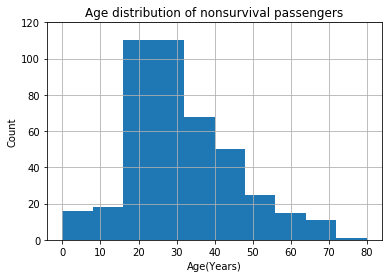

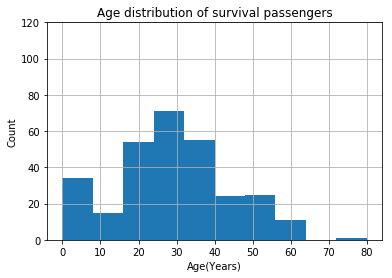

In [20]:
plot_by_age(non_survived_df,'nonsurvival')
plot_by_age(survived_df,'survival')
plt.show()

In [25]:
bins=np.array([0,10,20,30,40,50,60,70,80])
age_bins=pd.cut(agesex_df['Age'],bins)  # Return indices of half-open bins to which each value of x belongs.
agesex_df.groupby(age_bins).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64,64,64,10,64
"(10, 20]",115,115,115,115,115,115,115,115,115,115,19,115
"(20, 30]",230,230,230,230,230,230,230,230,230,230,40,230
"(30, 40]",155,155,155,155,155,155,155,155,155,155,50,154
"(40, 50]",86,86,86,86,86,86,86,86,86,86,33,86
"(50, 60]",42,42,42,42,42,42,42,42,42,42,22,42
"(60, 70]",17,17,17,17,17,17,17,17,17,17,9,16
"(70, 80]",5,5,5,5,5,5,5,5,5,5,2,5


In [27]:
counts = agesex_df.groupby(age_bins)['PassengerId'].count()
print (counts)

Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64


Text(0.5,1,'Percentage of passangers in age group')

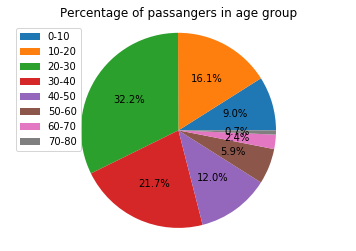

In [36]:
plt.pie(counts,autopct='%1.1f%%')

plt.axis('equal')
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
plt.legend(labels)
plt.title('Percentage of passangers in age group')

Text(0,0.5,'Survival rate')

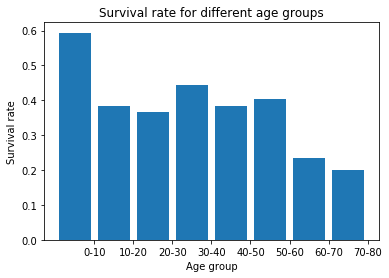

In [40]:
n_groups=8

index=np.arange(n_groups)
means=agesex_df.groupby(age_bins)['Survived'].mean()
plt.bar(index,means)

bar_width=0.5

labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
plt.xticks(index + bar_width, labels)

plt.title('Survival rate for different age groups')
plt.xlabel('Age group')
plt.ylabel('Survival rate')

It seems that the people of age 0-10 (children), have the highest survival rate. Old people have the lowest survival rate.

It may be due to:
1. Old people are less physically strong as young people
2. Old people sacrifice their change
3. Children have the higher priority
4. Children are small in size and are easier to be saved with limited lifeboat


([<matplotlib.axis.XTick at 0x2c6f18756d8>,
 <a list of 3 Text xticklabel objects>)

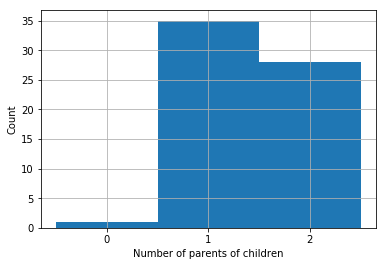

In [44]:
children_df=agesex_df[agesex_df['Age']<=10]

number_of_children = children_df['PassengerId'].count()
children_df['Parch'].hist(bins=np.arange(4)-0.5)

plt.xlabel('Number of parents of children')
plt.ylabel('Count')
plt.xticks(range(3))

Most children have 1-2 parents.

Next I will try to see whether the number of parents/siblings is related to the survival rate.

In [45]:
children_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,391.153846,2.923077,5.423077,3.192308,1.538462,34.479165
1,458.000000,2.447368,3.478158,0.921053,1.342105,27.666995


Non-survived children have a much higher number of siblings. This may be because when there are many siblings, a single child may not get as much attention and care as those with fewer siblings. The average number of parents do not differ in survived and nonsurvived group, because almost all children traveled with parents.

513


Text(0.5,1,'Survival rate for female and male passengers')

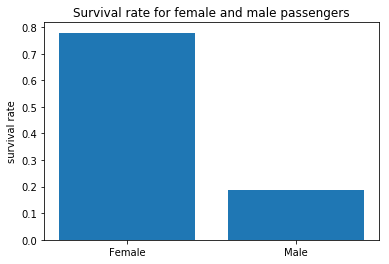

In [54]:
adult_df20=agesex_df[agesex_df['Age'] > 20]
adult_df=adult_df20[adult_df20['Age'] <= 60]

print (adult_df['PassengerId'].count())

adult_male=adult_df[adult_df['Sex']=='male']
adult_female=adult_df[adult_df['Sex']=='female']

y=adult_df.groupby('Sex')['Survived'].mean()
plt.bar((1,2),y,align='center')
plt.xticks((1,2),('Female','Male'))
plt.ylabel('survival rate')
plt.title('Survival rate for female and male passengers')

It seems that female have a higher survival rate.

In addition, it seems that the people from a higher class have a higher survival rate. I will check that focusing on the adult

In [55]:
class_df=adult_df.groupby('Pclass')

class_df['Survived'].count()

Pclass
1    151
2    135
3    227
Name: Survived, dtype: int64

Text(0,0.5,'Survival rate')

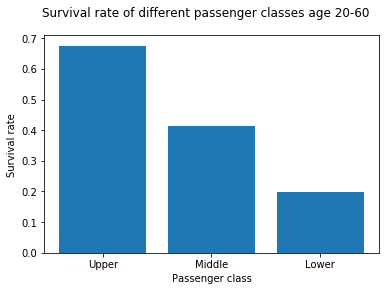

In [59]:
y2=class_df['Survived'].mean()
plt.bar((1,2,3),y2)

plt.xticks((1,2,3),('Upper','Middle','Lower'))
plt.suptitle('Survival rate of different passenger classes age 20-60')
plt.xlabel('Passenger class')
plt.ylabel('Survival rate')

It is clear that adult passangers with higher class have a higher survival rate.

It may by due to:
1. Higher class may be close to the lifeboat
2. Higher class may be close to the exit
3. Higher class provide better safety equipment

The class could also be reflected to the ticket fare, which is shown below.

In [61]:
class_df['Fare'].mean()

Pclass
1    86.638522
2    20.871667
3    11.532706
Name: Fare, dtype: float64

In [65]:
Upper_df=adult_df[adult_df['Pclass']==1]
Middle_df=adult_df[adult_df['Pclass']==2]
Lower_df=adult_df[adult_df['Pclass']==3]

In [66]:
def plot_class(dataframe,classname):
    dataframe.hist(column='Fare',bins=50,range=(0,600))
    title='Fare distribution of '+classname+' class'
    plt.title(title)
    plt.xlabel('Fare')
    plt.ylabel('Count')

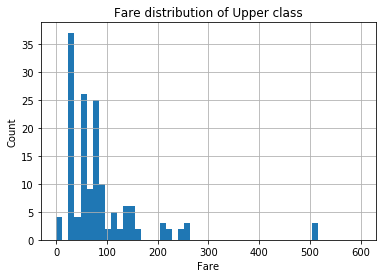

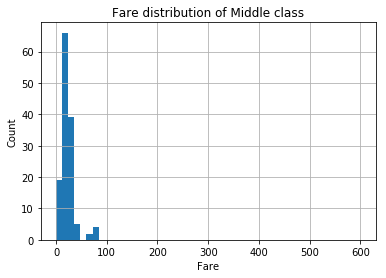

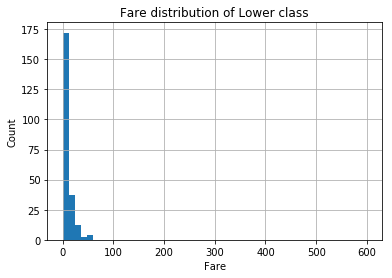

In [67]:
plot_class(Upper_df,'Upper')
plot_class(Middle_df,'Middle')
plot_class(Lower_df,'Lower')

It is clear that upper class passengers pay much higher fare than middle and lower class. There is one value in upper class that seems like an outlier (>500). Although there could be extremely expensive first class tickets, it is somewhat unlikely because all other values are below 300. Given that there are 513 passengers in total, the effect of this outlier on overall results would be little. Therefore, I will not remove it in my analysis.

I will now calculate the survival rate for different sexes and classes.

In [70]:
survival_per_sex_class=adult_df.groupby(['Pclass','Sex'])['Survived'].count()
print (survival_per_sex_class)

Pclass  Sex   
1       female     69
        male       82
2       female     58
        male       77
3       female     54
        male      173
Name: Survived, dtype: int64


In [72]:
pd1=adult_female.groupby('Pclass')['Survived'].mean()
pd2=adult_male.groupby('Pclass')['Survived'].mean()

data={'Female':pd1,'Male':pd2}
class_sex_df=pd.DataFrame(data).transpose()

print (class_sex_df)

Pclass         1         2         3
Female  0.971014  0.896552  0.407407
Male    0.426829  0.051948  0.132948


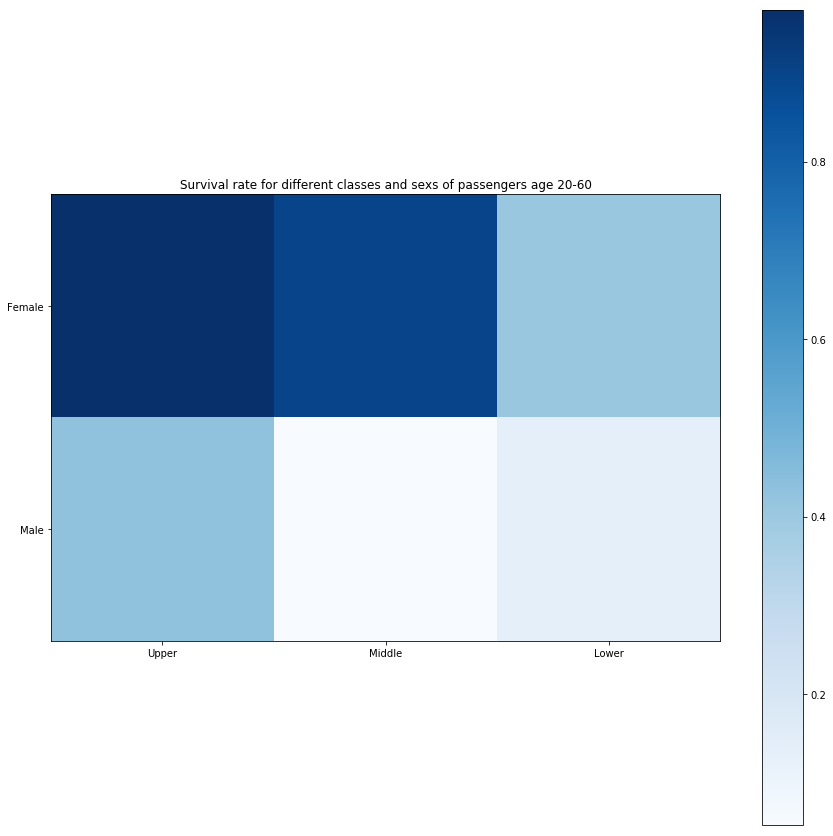

In [81]:
heatmap=class_sex_df
plt.figure(figsize=(15,15))

plt.imshow(heatmap,cmap=plt.cm.Blues,interpolation='nearest')
plt.xticks(range(3),('Upper','Middle','Lower'))
plt.yticks(range(2),('Female','Male'))
plt.title('Survival rate for different classes and sexs of passengers age 20-60')
plt.grid(False)
plt.colorbar()

This heatmap shows that upper class female adult passengers age 20-60 have the highest survival rate of 97%, while middle class and lower class male passengers have low survival rate below 20%.

## Conclusion

In conclusion, it is reported that the people with higher class and higher fares are more likely to survive. This may be related to the cabin equipment, location, safety setup, rescue priority.

The demographic features of survived passangers show that:
1. children of age 0-10 have the highest survival rate, and children with more siblings have lower survival rate. Further study may be necessary to find out the correlation between the survival of children and their parents.
2. People older than 60 have the lowest survival rate. Further study may be necessary fo find out the correlation between the survivals and their marraige.
3. Femail passangers have higher survival rate. Again, further study may be necessary fo find out whether they are single or married, and if married how were their husbands.

These findings conclude that children and upper class female are more likely to survive in Titanic.

Limitations: only 891 samples are available whereas the population is 2224. The data may not represent the population well and may have survival bias depending on the data collection process.
